Regression Model
1.Downloading the Dataset
2.Load the dataset into the tool


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [ ]:
abalone = pd.read_csv("abalone.csv")

FileNotFoundError: ignored

In [ ]:
abalone.head()

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


3.Perform Below Visualizations
(i) Univariate Analysis

(array([1.023e+03, 3.129e+03, 2.300e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.113, 0.226, 0.339, 0.452, 0.565, 0.678, 0.791, 0.904,
        1.017, 1.13 ]),
 <a list of 10 Patch objects>)

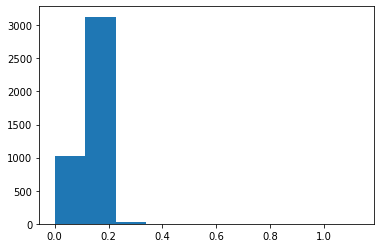

In [ ]:
plt.hist(abalone['Height'])

(ii) Bi-Variate Analysis


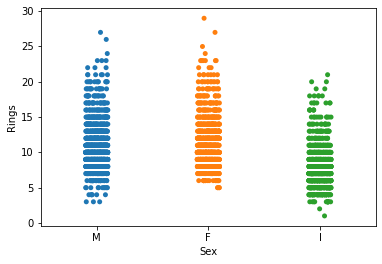

In [ ]:
sns.stripplot(x="Sex", y="Rings", data=abalone)

(iii) Multi-Variate Analysis

In [ ]:
df = sns.load_dataset('tips')

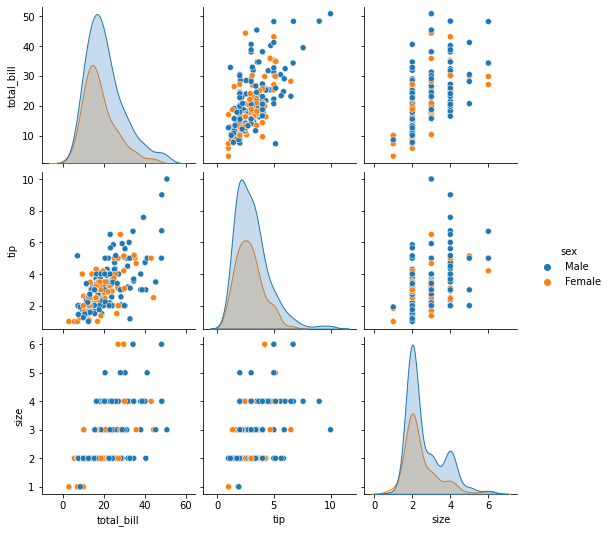

In [ ]:
sns.pairplot(df, hue ='sex')

4.Perform descriptive statistics on the dataset

In [ ]:
abalone.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


5.Check for Missing values and deal with them


In [ ]:
abalone.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

6.Find the outliers and replace them outliers

In [ ]:
outliers=abalone.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [ ]:
e = abalone.Rings.quantile(0.25)
f = abalone.Rings.quantile(0.75)
g = f - e
lower_limit = e - 1.5 * g
abalone.median(numeric_only=True)

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

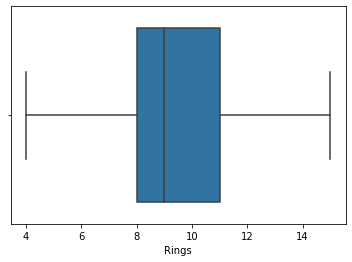

In [ ]:
abalone['Rings'] = np.where(abalone['Rings'] < lower_limit, 7, abalone['Rings'])
sns.boxplot(x=abalone.Rings,showfliers = False)


7.Check for Categorical columns and perform encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
abalone.Sex = lab.fit_transform(abalone.Sex)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


8.Split the data into dependent and independent variables

In [ ]:
y = abalone["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

In [ ]:
x=abalone.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


9.Scale the independent variables


In [ ]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.579401
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.922959
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.297369
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.015426
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.922959


10.Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.8, random_state=25)

In [ ]:
X_Train.shape,X_Test.shape

((835, 8), (3342, 8))

In [ ]:
Y_Train.shape,Y_Test.shape

((835,), (3342,))

11.Build the Model


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_Train, Y_Train)
predicted_test_y = model.predict(X_Test)
predicted_train_y = model.predict(X_Train)

12.Train the Model


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_Train,predicted_train_y))

Training accuracy:  1.0


13.Test the Model

In [ ]:
print('Testing accuracy: ',accuracy_score(Y_Test,predicted_test_y))

Testing accuracy:  0.4814482345900658


14.Measure the performance using Metrics

In [ ]:
pd.crosstab(Y_Test,predicted_test_y)
print(classification_report(Y_Test,predicted_test_y))


              precision    recall  f1-score   support

           0       0.40      0.42      0.41      1038
           1       0.63      0.64      0.64      1078
           2       0.42      0.39      0.40      1226

    accuracy                           0.48      3342
   macro avg       0.48      0.48      0.48      3342
weighted avg       0.48      0.48      0.48      3342

